## Trading View Report: 2 - Normalized Visualization

When evaluating data that has been processed using statistical methods, it can be useful to consider the intervals and relationships instead of the actual values.
One way we can do this is by normalizing all of the data, to show what it looks like in a 1x1 Universe.

With normalized performance metrics, the analyst can visually compare attributes whos values differ in magnitude, as if they are of equivalent sizes.
Doing this enables a picture that contains volume, price and price difference in one picture that puts them all in a relatable context.

In this example the data comes from Trading View, and was manually downloaded then processed to normalize and include a regression line.

In [1]:
#  packages & data

import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.offline as pyo
import plotly.graph_objs as go
import pandas as pd
import numpy as np


file = 'eth_15min_12292020_normalized.csv'
#path = 'Desktop/JARVIS/Trading View Project/'

df = pd.read_csv(file, index_col=0)
df.head(3)

,close,p_close,difference,Volume,close_norm,vol_norm,diff_norm,moving_5,moving_8,moving_13,reg
date,,,,,,,,,,,
2020-12-23 15:15:00,612.73,NaN,NaN,4.300000,0.238439,0.000924,NaN,NaN,NaN,NaN,-0.011730
2020-12-23 15:30:00,611.33,612.73,-1.40,12.253819,0.230553,0.002640,0.440021,NaN,NaN,NaN,-0.010138
2020-12-23 15:45:00,606.26,611.33,-5.07,10.997087,0.201994,0.002369,0.341972,NaN,NaN,NaN,-0.008545


Plotly is used to put the normalized values into a chart.  Plotly was chosen because it can be easily added to a web page using Dash.
Dash enables the presentation of several charts, interactivity and layout creation.  From the web page view, the page can be exported
as a .pdf file if desired.

This example will focus on the creation of just this one chart, to emphasize the utility of normalization.

An example of a normalization function is included in the notebook that shows how this data was set up.

In [2]:
#  Create plot showing all normalized values 

cx_values = df.index
cy_values = df['close_norm']

vx_values = df.index
vy_values = df['reg']

fmax_values = df.index
fmay_values = df['moving_5']

smax_values = df.index
smay_values = df['moving_13']

difx_values = df.index
dify_values = df['diff_norm']

volx_values = df.index
voly_values = df['vol_norm']

close = go.Scatter(x=cx_values, 
                   y=cy_values,
                  mode='lines',
                  marker_color='lime',
                  name='close')

reg = go.Scatter(x=vx_values, 
                   y=vy_values,
                  mode='lines',
                  marker_color='yellow',
                  name='regression')

fast_ma = go.Scatter(x=fmax_values, 
                   y=fmay_values,
                  mode='lines',
                  marker_color='tomato',
                  name='fast_ma')

slow_ma = go.Scatter(x=smax_values, 
                   y=smay_values,
                  mode='lines',
                  marker_color='violet',
                  name='slow_ma')

difference = go.Scatter(x=difx_values, 
                   y=dify_values,
                  mode='markers',
                  marker_color='skyblue',
                  name='difference')

volume = go.Bar(x=volx_values, 
                   y=voly_values,
                  #mode='lines',
                  marker_color='salmon',
                  name='volume')


data = [volume, reg, difference, slow_ma, close, fast_ma]

layout = go.Layout(title='Normalized Performance')

fig = go.Figure(data=data, layout=layout)
fig.update_layout(plot_bgcolor='darkslategrey')
fig.update_layout(paper_bgcolor='silver')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='teal')

pyo.plot(fig)

'temp-plot.html'

Because plotly opens a temporary web page to view at this stage, a .png file exported from the web page is shown below:

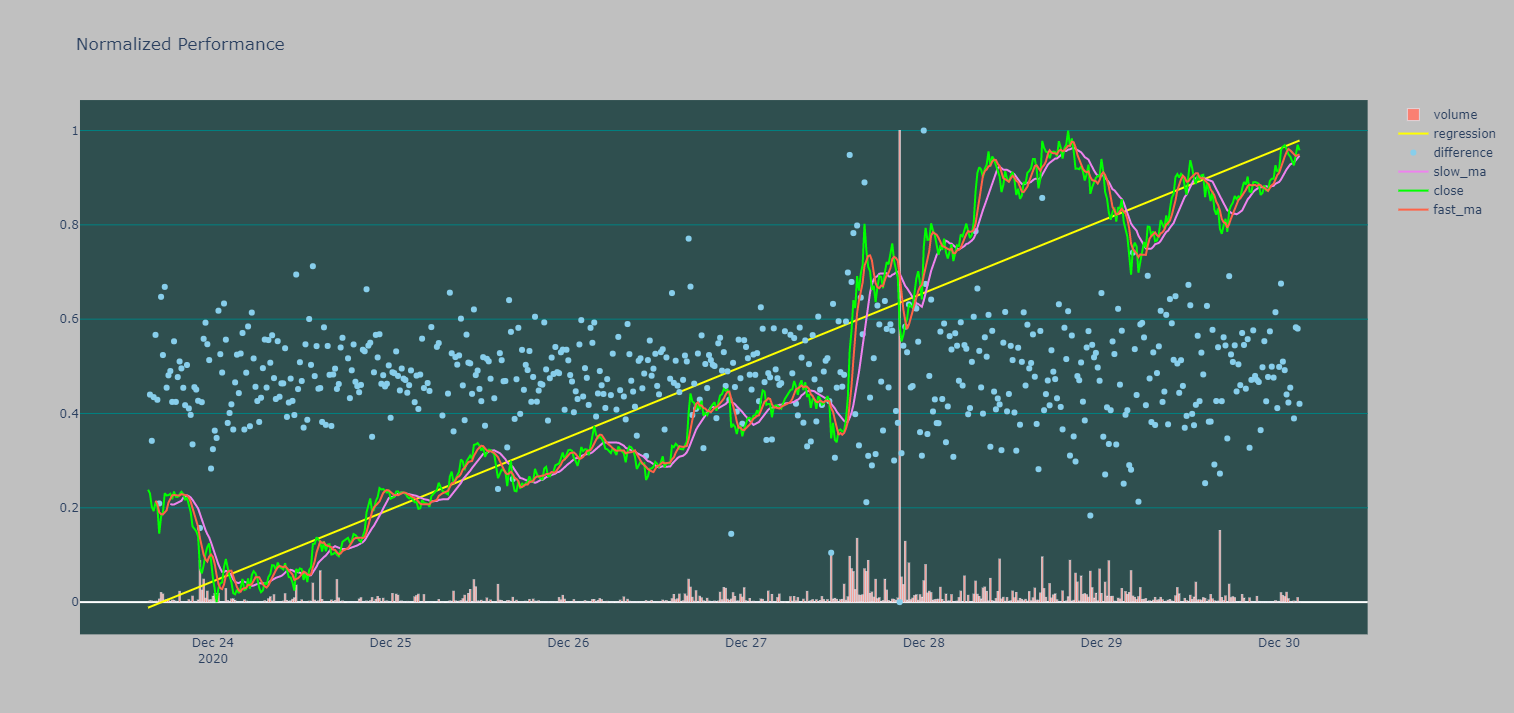

In [3]:
from IPython.display import Image
Image(filename='newplot_eth.png') 

Notice how the colors affect your ability to distnguish between and focus on different elements.
Use the element order, color palates and opacity to get a mix that works best for your analytical style.

The web page has some interactive features that enable zooming and other exploration of the data.
The .png image of the page that can be exported from the page does not retain those features.

The intent here is to illustrate how normalization can be used to add depth of understanding to a set of performance data.
The specific attributes and chart types used are up to the analyst and the context of the exploration.